In [7]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

In [12]:
df = pd.read_csv("archive/rfm_cluster_data.csv", delimiter=",")

In [13]:
df.head(100)

,Customer ID,Recency,Tenure,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,TenureScore,RFM_SCORE,Segment,BasketSize
0,12346.0,165,357,4,73,2,4,1,4,241,At_Risk,18.250000
1,12347.0,3,40,2,379,5,2,4,1,524,Potential_Loyalists,189.500000
2,12348.0,74,74,1,74,2,1,1,1,211,Hibernating,74.000000
3,12349.0,43,225,3,738,3,3,5,3,335,Need_Attention,246.000000
4,12351.0,11,11,1,92,5,1,2,1,512,New_Customers,92.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
95,12483.0,14,313,11,822,5,5,5,4,555,Champions,74.727273
96,12484.0,119,317,5,625,2,4,4,4,244,At_Risk,125.000000
97,12485.0,165,165,1,152,2,1,2,2,212,Hibernating,152.000000
98,12486.0,67,67,1,482,3,1,4,1,314,About_to_Sleep,482.000000


In [15]:
df.index = df["Customer ID"]

In [16]:
df.head()

,Customer ID,Recency,Tenure,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,TenureScore,RFM_SCORE,Segment,BasketSize
Customer ID,,,,,,,,,,,,
12346.0,12346.0,165,357,4,73,2,4,1,4,241,At_Risk,18.25
12347.0,12347.0,3,40,2,379,5,2,4,1,524,Potential_Loyalists,189.50
12348.0,12348.0,74,74,1,74,2,1,1,1,211,Hibernating,74.00
12349.0,12349.0,43,225,3,738,3,3,5,3,335,Need_Attention,246.00
12351.0,12351.0,11,11,1,92,5,1,2,1,512,New_Customers,92.00


In [17]:
df.drop("Customer ID", axis=1, inplace=True)

In [18]:
df.head()

,Recency,Tenure,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,TenureScore,RFM_SCORE,Segment,BasketSize
Customer ID,,,,,,,,,,,
12346.0,165,357,4,73,2,4,1,4,241,At_Risk,18.25
12347.0,3,40,2,379,5,2,4,1,524,Potential_Loyalists,189.50
12348.0,74,74,1,74,2,1,1,1,211,Hibernating,74.00
12349.0,43,225,3,738,3,3,5,3,335,Need_Attention,246.00
12351.0,11,11,1,92,5,1,2,1,512,New_Customers,92.00


In [20]:
segment_data = df[["RecencyScore","FrequencyScore","MonetaryScore"]]

In [21]:
segment_data.head()

,RecencyScore,FrequencyScore,MonetaryScore
Customer ID,,,
12346.0,2,4,1
12347.0,5,2,4
12348.0,2,1,1
12349.0,3,3,5
12351.0,5,1,2


In [23]:
kmeans = KMeans(n_clusters=4).fit(segment_data)

In [24]:
kmeans.labels_

array([2, 3, 2, ..., 2, 0, 1], dtype=int32)

In [25]:
for i in kmeans.labels_:
    print(i)

2
3
2
0
3
3
3
2
1
1
1
0
1
2
2
2
2
0
2
0
2
0
3
3
2
3
0
3
3
3
0
0
0
2
3
1
2
3
3
1
2
1
1
0
2
3
0
3
2
1
2
1
0
3
3
1
3
0
2
2
3
1
1
1
3
1
1
2
2
3
2
3
2
3
0
1
0
3
3
2
2
2
3
0
0
2
1
1
1
3
1
1
1
1
0
1
0
2
3
2
1
3
3
2
2
1
2
0
3
3
2
0
0
2
0
2
1
1
0
2
2
0
2
0
3
3
0
1
2
2
2
0
3
2
2
1
3
3
1
2
3
2
3
1
3
2
0
1
1
3
0
3
0
1
2
2
1
1
3
1
2
3
1
1
0
3
2
1
1
0
3
0
2
1
2
3
1
2
3
1
0
0
1
0
1
3
0
3
0
2
1
2
0
3
3
1
3
2
2
3
2
0
2
1
1
1
1
3
2
3
2
2
3
0
3
2
3
0
0
1
1
1
0
1
1
2
1
3
1
1
1
0
3
2
0
1
3
3
3
2
2
0
2
2
1
1
1
2
1
0
1
2
2
3
0
1
3
2
0
2
2
2
3
2
2
3
1
2
1
2
2
2
3
0
2
3
1
2
3
2
3
3
2
0
2
0
3
2
1
0
3
3
0
2
3
0
3
2
1
2
1
2
1
2
2
1
1
2
1
1
0
1
3
1
2
2
3
2
1
2
0
0
3
0
3
2
2
2
0
1
3
2
1
3
2
1
2
1
3
3
0
3
1
3
3
3
3
2
3
2
3
2
3
3
3
2
3
1
0
1
2
1
3
0
1
2
1
3
1
2
0
3
1
1
0
1
1
0
1
2
3
2
2
2
3
2
1
1
2
2
2
0
3
2
0
3
1
2
1
2
1
1
0
2
0
1
0
1
2
1
1
2
1
0
1
0
3
2
0
3
3
0
2
1
3
1
3
2
3
2
2
3
0
1
3
0
1
1
2
1
2
2
2
0
1
3
3
0
1
3
3
3
2
1
0
0
0
0
3
2
1
0
3
1
2
0
2
3
2
2
1
2
2
1
3
1
2
2
3
0
2
1
1
3
3
1
1
3
2
0
3
2
3
1
1
2
1
1
3
1


In [30]:
kmeans.inertia_

3422.505850741958

11919.350463726707
9265.015960147772
6675.421483241924
5714.176372799807
5217.963118204214
4447.289009941067
4368.087872256634
4086.29749847308
3715.9947075443642
3416.025088539799


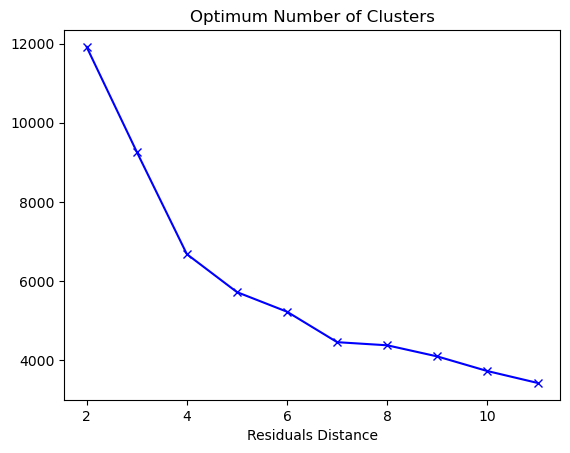

In [32]:
ssd = []
K = range(2,12)

for k in K:
    kmeans = KMeans(n_clusters=k).fit(segment_data)
    print(kmeans.inertia_)
    ssd.append(kmeans.inertia_)

plt.plot(K, ssd, "bx-")
plt.xlabel("Residuals Distance")
plt.title("Optimum Number of Clusters")
plt.show()

In [33]:
kmeans = KMeans(n_clusters=5).fit(segment_data)

In [37]:
segment_data.loc[:, "Clusters"] = kmeans.labels_

/var/folders/st/g578wh254q58gyrbtjhdkz380000gn/T/ipykernel_53959/3570243721.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_data.loc[:, "Clusters"] = kmeans.labels_


In [38]:
segment_data.head()

,RecencyScore,FrequencyScore,MonetaryScore,Segment,Clusters
Customer ID,,,,,
12346.0,2,4,1,3,3.0
12347.0,5,2,4,4,4.0
12348.0,2,1,1,3,3.0
12349.0,3,3,5,2,2.0
12351.0,5,1,2,0,0.0


In [39]:
segment_data.drop("Segment", axis=1, inplace=True)

/var/folders/st/g578wh254q58gyrbtjhdkz380000gn/T/ipykernel_53959/1363310423.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_data.drop("Segment", axis=1, inplace=True)


In [40]:
segment_data.head()

,RecencyScore,FrequencyScore,MonetaryScore,Clusters
Customer ID,,,,
12346.0,2,4,1,3.0
12347.0,5,2,4,4.0
12348.0,2,1,1,3.0
12349.0,3,3,5,2.0
12351.0,5,1,2,0.0


In [42]:
segmentation = df[["Segment"]].merge(segment_data, on="Customer ID")

In [43]:
segmentation.head()

,Segment,RecencyScore,FrequencyScore,MonetaryScore,Clusters
Customer ID,,,,,
12346.0,At_Risk,2,4,1,3.0
12347.0,Potential_Loyalists,5,2,4,4.0
12348.0,Hibernating,2,1,1,3.0
12349.0,Need_Attention,3,3,5,2.0
12351.0,New_Customers,5,1,2,0.0


In [44]:
pd.crosstab(segmentation["Segment"], segmentation["Clusters"])

Clusters,0.0,1.0,2.0,3.0,4.0
Segment,,,,,
About_to_Sleep,299,0,15,0,0
At_Risk,0,0,453,143,0
Cant_Loose,0,0,73,0,0
Champions,0,537,0,0,89
Hibernating,0,0,41,949,0
Loyal_Customers,0,456,180,0,93
Need_Attention,66,0,134,0,0
New_Customers,38,0,0,0,1
Potential_Loyalists,163,18,0,0,321


# Clustering - Hierarchical

In [45]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
#from sklearn.datasets import make_blobs

In [46]:
df.head()

,Recency,Tenure,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,TenureScore,RFM_SCORE,Segment,BasketSize
Customer ID,,,,,,,,,,,
12346.0,165,357,4,73,2,4,1,4,241,At_Risk,18.25
12347.0,3,40,2,379,5,2,4,1,524,Potential_Loyalists,189.50
12348.0,74,74,1,74,2,1,1,1,211,Hibernating,74.00
12349.0,43,225,3,738,3,3,5,3,335,Need_Attention,246.00
12351.0,11,11,1,92,5,1,2,1,512,New_Customers,92.00


In [58]:
segment_data1 = df[["RecencyScore","FrequencyScore","MonetaryScore","TenureScore"]]

In [48]:
segment_data1.head()

,RecencyScore,FrequencyScore,MonetaryScore,TenureScore
Customer ID,,,,
12346.0,2,4,1,4
12347.0,5,2,4,1
12348.0,2,1,1,1
12349.0,3,3,5,3
12351.0,5,1,2,1


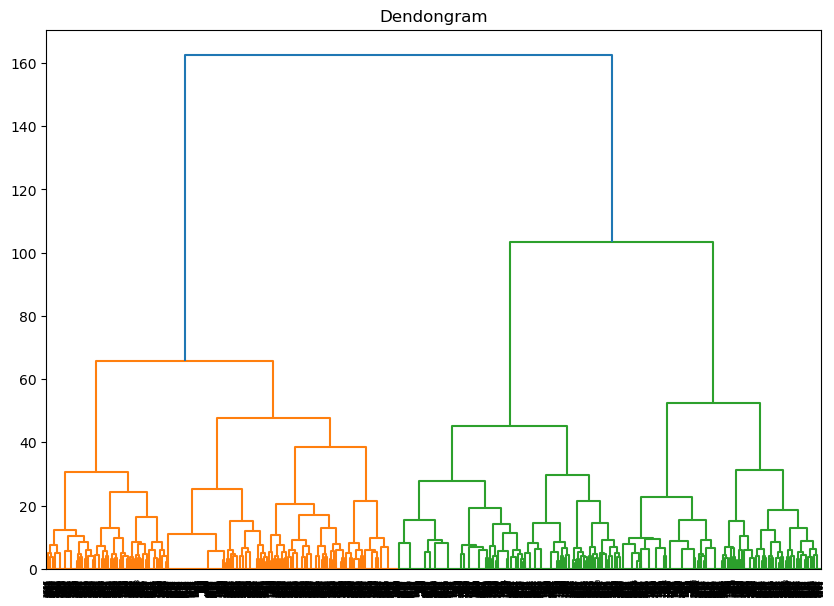

In [50]:
plt.figure(figsize=(10,7))
plt.title("Dendongram")

linkage_mehod = linkage(segment_data1, method="ward", metric="euclidean")
Dendrogram = dendrogram(linkage_mehod)

In [53]:
cluster_ea = AgglomerativeClustering(n_clusters=5, linkage="ward")

In [59]:
cluster_labels = cluster_ea.fit_predict(segment_data1)

In [60]:
segment_data1["clusters_hy"] = cluster_labels

/var/folders/st/g578wh254q58gyrbtjhdkz380000gn/T/ipykernel_53959/3017652743.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_data1["clusters_hy"] = cluster_labels


In [61]:
segment_data1.head()

,RecencyScore,FrequencyScore,MonetaryScore,TenureScore,clusters_hy
Customer ID,,,,,
12346.0,2,4,1,4,2
12347.0,5,2,4,1,1
12348.0,2,1,1,1,4
12349.0,3,3,5,3,3
12351.0,5,1,2,1,4


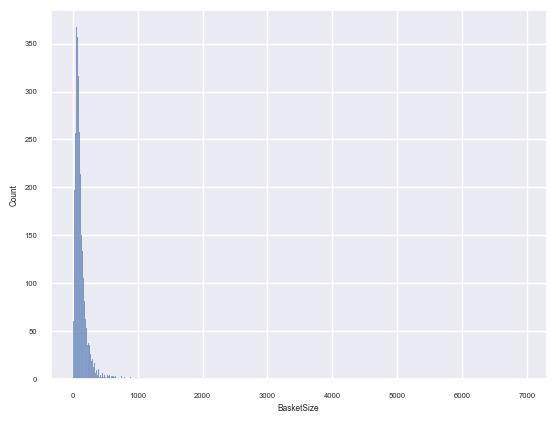

In [62]:
sns.set_theme(font_scale=0.5) # set theme for plots
sns.histplot(x=df["BasketSize"]);

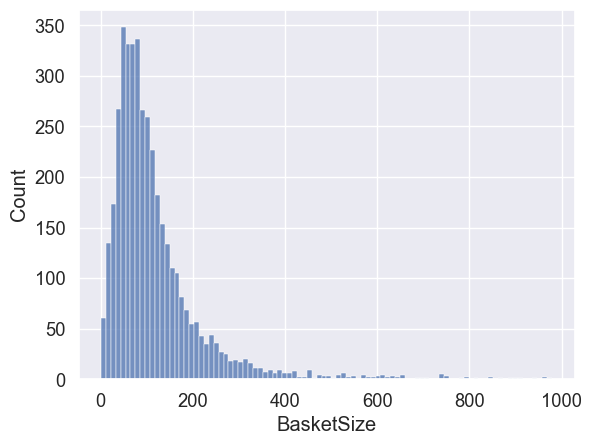

In [64]:
sns.set_theme(font_scale=1.2) # set theme for plots
sns.histplot(x=df[df["BasketSize"]<1000]["BasketSize"]);

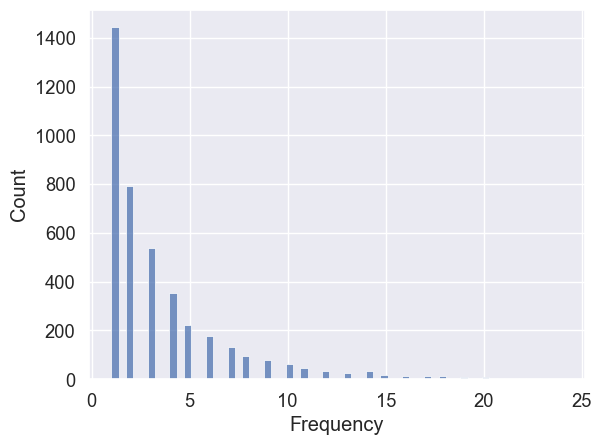

In [66]:
sns.set_theme(font_scale=1.2) # set theme for plots
sns.histplot(x=df[df["Frequency"]<25]["Frequency"]);

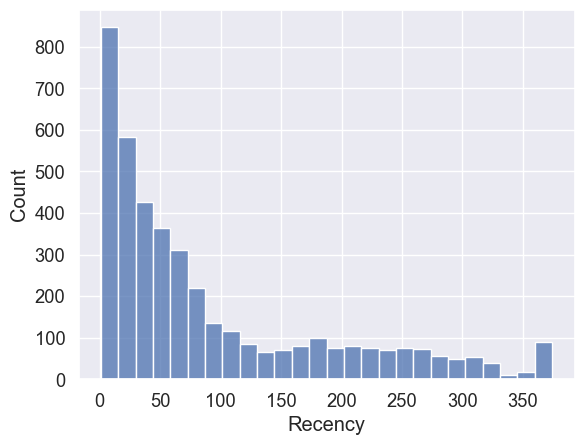

In [67]:
sns.set_theme(font_scale=1.2) # set theme for plots
sns.histplot(x=df["Recency"]);

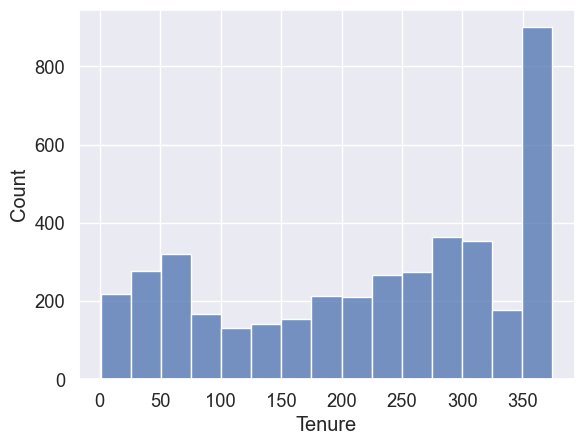

In [69]:
sns.set_theme(font_scale=1.2) # set theme for plots
sns.histplot(x=df["Tenure"]);

In [70]:
df.head()

,Recency,Tenure,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,TenureScore,RFM_SCORE,Segment,BasketSize
Customer ID,,,,,,,,,,,
12346.0,165,357,4,73,2,4,1,4,241,At_Risk,18.25
12347.0,3,40,2,379,5,2,4,1,524,Potential_Loyalists,189.50
12348.0,74,74,1,74,2,1,1,1,211,Hibernating,74.00
12349.0,43,225,3,738,3,3,5,3,335,Need_Attention,246.00
12351.0,11,11,1,92,5,1,2,1,512,New_Customers,92.00


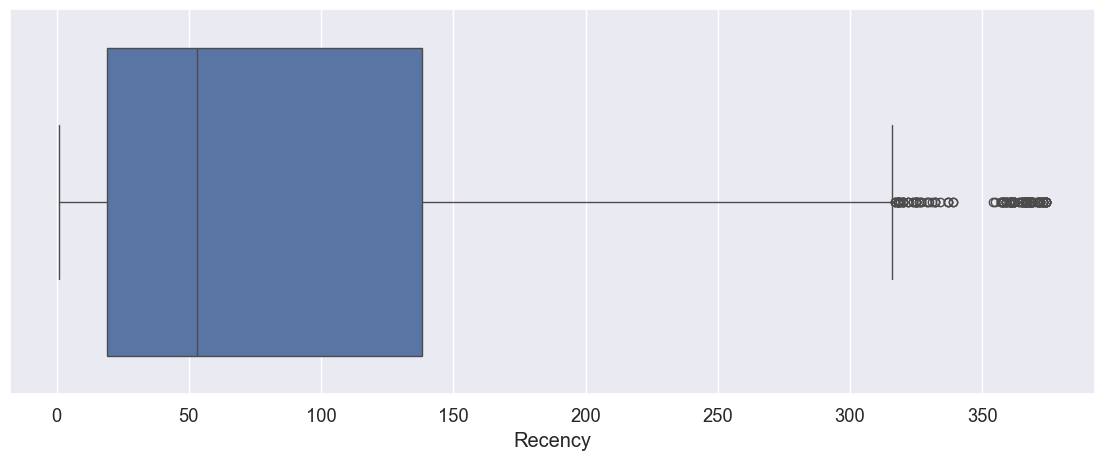

In [71]:
plt.figure(figsize=(14, 5))
sns.boxplot(data=df, x="Recency");

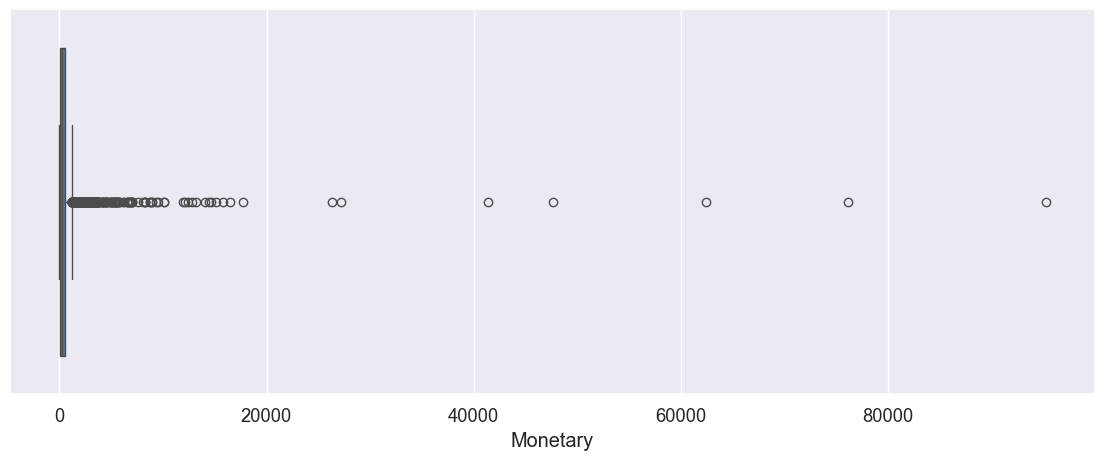

In [73]:
plt.figure(figsize=(14, 5))
sns.boxplot(data=df, x="Monetary");

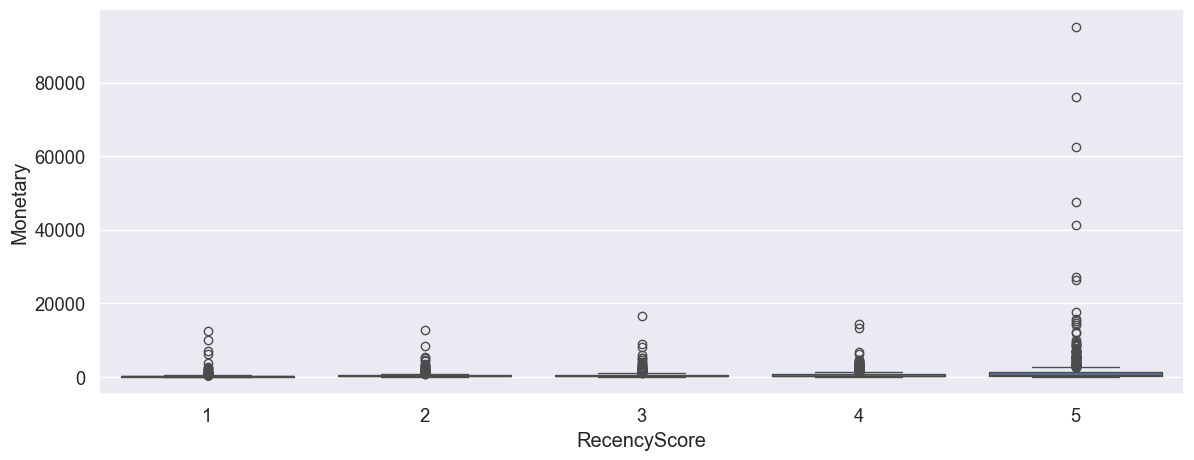

In [74]:
plt.figure(figsize=(14, 5))
sns.boxplot(data=df, x="RecencyScore", y="Monetary");

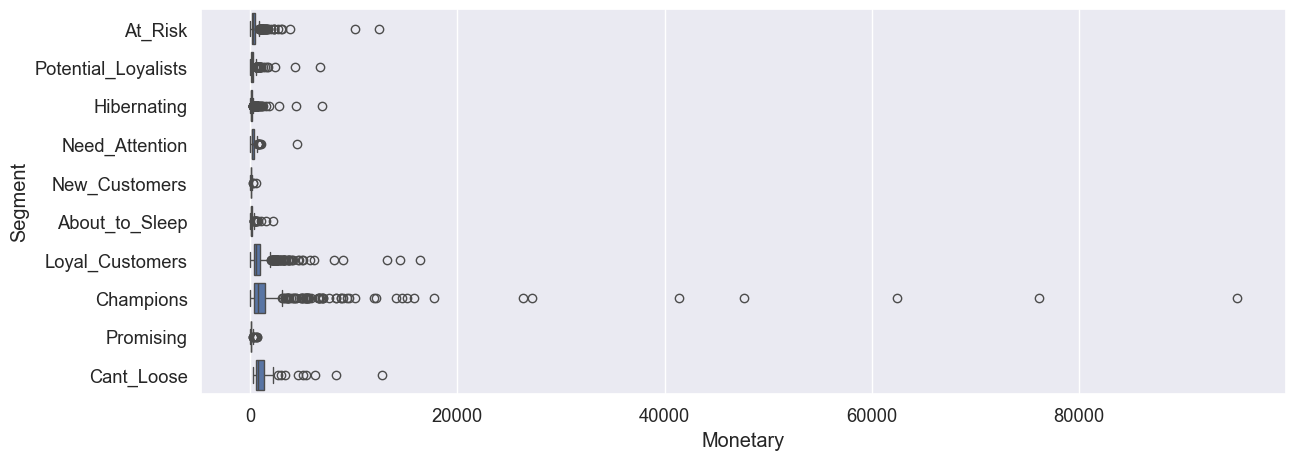

In [76]:
plt.figure(figsize=(14, 5))
sns.boxplot(data=df, x="Monetary", y="Segment");

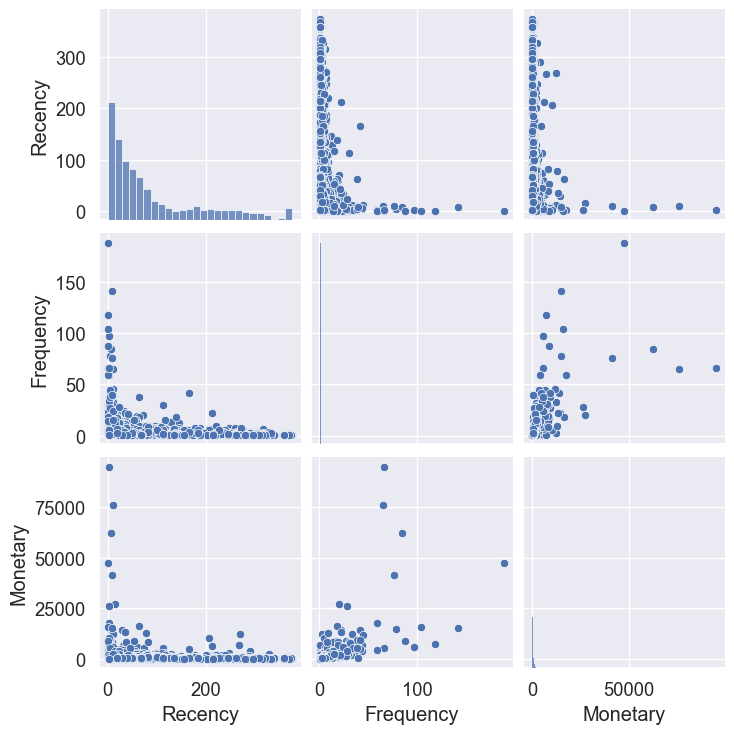

In [78]:
sns.pairplot(df[["Recency","Frequency","Monetary"]]);